In [30]:
rm(list = ls())
options(stringsAsFactors = F)
suppressMessages(library(ggplot2))
suppressMessages(library(tidyverse))
suppressMessages(library(viridis))
suppressMessages(library(ggsci))
suppressMessages(library(edgeR))

In [31]:
setwd("/home/glab/czy/scibet/T-cell/liver/")

In [121]:
source("/home/glab/czy/scibet/test/SciBet_modified.R")
source("/home/glab/czy/scibet/test/Batch_correction.R")

In [33]:
# data <- readRDS("data_ori.rds")
# data_transpose_count <- data.frame(t(data))
# saveRDS(data_transpose_count, file="data_transpose_count.rds")

In [34]:
# start from here
data_transpose_count <- readRDS("data_transpose_count.rds")
# data_transpose_count <- readRDS("data_ori.rds")
print(dim(data_transpose_count))
label <- readRDS("anno.rds")
data_transpose_count$label <- label$majorCluster
data_transpose_count$batch <- label$PatientID

[1]  5062 23389


In [35]:
# 肝癌数据存在一个缺失值
for (i in 1:length(label$majorCluster)){
    if (is.na(label$majorCluster[i])){
        data_transpose_count$label[i] <- "unknown" 
        label$majorCluster[i] <- "unknown"
        print(i)
    }
}

[1] 186


In [36]:
batch.info <- label$PatientID
print(length(batch.info))
for (i in 1:length(batch.info)){
    if (is.na(batch.info[i])){
        batch.info[i] <- "unknown"
        data_transpose_count$batch[i] <- "unknown"
        print(i)
    }
}
# batch.info
# as.factor(batch.info)

[1] 5062
[1] 186


In [37]:
# 去除unknown细胞
data_delete_unknown <- data_transpose_count[-which(data_transpose_count$label == "unknown"),]

In [38]:
data_delete_unknown

,A1BG,NAT2,ADA,CDH2,AKT3,GAGE12F,ZBTB11.AS1,MED6,NR2E3,NAALAD2,⋯,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2,label,batch
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>
PTC141.0205,0,0,0,0,358,0,0,0,0,0,⋯,0,0,0,201,0,0,0,0,C03_CD8-SLC4A10,P0205
PTC142.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,132,360,0,29,1340,0,C02_CD8-CX3CR1,P0205
PTC143.0205,0,0,556,0,0,0,0,0,0,0,⋯,0,0,12,0,0,80,0,0,C01_CD8-LEF1,P0205
PTC144.0205,0,0,0,0,200,0,0,0,0,0,⋯,0,0,0,41,0,45,0,0,C02_CD8-CX3CR1,P0205
TTC100.0205,1,0,11,0,23,0,0,102,0,0,⋯,0,0,24,0,0,3,0,11,C04_CD8-LAYN,P0205
TTC2.0205,0,0,0,0,0,0,0,0,0,0,⋯,67,0,7,596,0,0,0,0,C03_CD8-SLC4A10,P0205
TTC97.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,7,468,0,0,0,0,C01_CD8-LEF1,P0205
TTC98.0205,0,0,1,0,65,0,0,173,0,0,⋯,0,0,0,0,0,0,150,0,C03_CD8-SLC4A10,P0205
TTC99.0205,0,0,52,0,0,0,0,7,0,89,⋯,0,0,0,320,0,0,0,0,C05_CD8-GZMK,P0205


In [42]:
meta.data <- data_delete_unknown[,(dim(data_delete_unknown)[2]-1):dim(data_delete_unknown)[2]]
meta.data

,label,batch
,<chr>,<chr>
PTC141.0205,C03_CD8-SLC4A10,P0205
PTC142.0205,C02_CD8-CX3CR1,P0205
PTC143.0205,C01_CD8-LEF1,P0205
PTC144.0205,C02_CD8-CX3CR1,P0205
TTC100.0205,C04_CD8-LAYN,P0205
TTC2.0205,C03_CD8-SLC4A10,P0205
TTC97.0205,C01_CD8-LEF1,P0205
TTC98.0205,C03_CD8-SLC4A10,P0205
TTC99.0205,C05_CD8-GZMK,P0205


In [45]:
# 若使用combat_seq去批次，先提取特征基因，获取新的表达矩阵
temp <- data_delete_unknown[,1:(dim(data_delete_unknown)[2]-1)]
etest_gene <- SelectGene_R(temp, k = 2000)
index_gene <- c()
for (i in 1:length(etest_gene)){
    # print(which(colnames(data_CD4_CD8) == etest_gene[i]))
    index_gene <- c(index_gene, which(colnames(temp) == etest_gene[i]))
}
index_gene <- sort(index_gene, decreasing = FALSE)
data_delete_unknown <- temp[, index_gene]

In [46]:
data_delete_unknown

,SNORD116.26,CDKN2B.AS1,SLCO4A1.AS1,C10orf131,LINC00892,UNQ6494,C17orf107,LOC100130872,LOC100131047,WDR86.AS1,⋯,SV2A,SRGAP3,CDC20,TMCC2,KBTBD11,KIF14,P2RY14,XYLB,GFPT2,CDC25C
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
PTC141.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PTC142.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PTC143.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PTC144.0205,0,0,0,0,0,0,0,426,0,0,⋯,0,0,0,0,0,0,0,0,0,0
TTC100.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,84,0,0,0,0,0,0,0,0
TTC2.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
TTC97.0205,0,0,0,0,0,0,0,0,0,76,⋯,0,0,0,0,0,0,0,0,0,0
TTC98.0205,0,0,0,0,12,0,0,0,0,0,⋯,0,0,0,0,0,0,2,0,0,0
TTC99.0205,0,0,0,0,0,0,0,161,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [47]:
# Combat_seq输入基因-细胞矩阵
data_delete_unknown <- data.frame(t(data_delete_unknown))
data_delete_unknown <- as.matrix(data_delete_unknown)
# data_delete_unknown[1:2000, ]

In [53]:
batch.info <- meta.data$batch
length(batch.info)
batch.info <- as.factor(batch.info)

[1] 4070

In [54]:
data.new <- ComBat_seq(data_delete_unknown, batch=batch.info, group=NULL)

                 PTC141.0205 PTC142.0205 PTC143.0205 PTC144.0205 TTC100.0205
SNORD116.26                0           0           0           0           0
CDKN2B.AS1                 0           0           0           0           0
SLCO4A1.AS1                0           0           0           0           0
C10orf131                  0           0           0           0           0
LINC00892                  0           0           0           0           0
UNQ6494                    0           0           0           0           0
C17orf107                  0           0           0           0           0
LOC100130872               0           0           0         426           0
LOC100131047               0           0           0           0           0
WDR86.AS1                  0           0           0           0           0
MIR181A1HG                 0           0           0           0           0
LOC100131347               0           0           0           0           0

In [83]:
data.new
print(dim(data.new))

,PTC141.0205,PTC142.0205,PTC143.0205,PTC144.0205,TTC100.0205,TTC2.0205,TTC97.0205,TTC98.0205,TTC99.0205,PTC17.0205,⋯,TTR155.0508,TTR160.0508,TTR161.0508,TTR163.0508,TTR164.0508,TTR167.0508,TTR173.0508,TTR176.0508,TTR179.0508,TTR189.0508
SNORD116.26,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CDKN2B.AS1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SLCO4A1.AS1,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
C10orf131,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00892,0,0,0,0,0,0,0,11,0,0,⋯,0,0,0,0,0,0,0,0,0,0
UNQ6494,0,0,0,0,0,0,0,0,0,0,⋯,128,0,0,0,0,0,0,0,0,0
C17orf107,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LOC100130872,0,0,0,729,0,0,0,0,277,0,⋯,0,0,0,283,0,0,0,0,0,0
LOC100131047,0,0,0,0,0,0,0,0,0,0,⋯,0,1,2,0,0,0,0,0,0,0
WDR86.AS1,0,0,0,0,0,0,201,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 2000 4070


In [58]:
# Scibet输入为细胞-基因矩阵，最后一列为label
data_delete_unknown <- data.frame(t(data.new))
data_delete_unknown$label <- meta.data$label

In [59]:
data_delete_unknown

,SNORD116.26,CDKN2B.AS1,SLCO4A1.AS1,C10orf131,LINC00892,UNQ6494,C17orf107,LOC100130872,LOC100131047,WDR86.AS1,⋯,SRGAP3,CDC20,TMCC2,KBTBD11,KIF14,P2RY14,XYLB,GFPT2,CDC25C,label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
PTC141.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,C03_CD8-SLC4A10
PTC142.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,C02_CD8-CX3CR1
PTC143.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,C01_CD8-LEF1
PTC144.0205,0,0,0,0,0,0,0,729,0,0,⋯,0,0,0,0,0,0,0,0,0,C02_CD8-CX3CR1
TTC100.0205,0,0,0,0,0,0,0,0,0,0,⋯,3,0,0,0,0,0,0,0,0,C04_CD8-LAYN
TTC2.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,C03_CD8-SLC4A10
TTC97.0205,0,0,0,0,0,0,0,0,0,201,⋯,0,0,0,0,0,0,0,0,0,C01_CD8-LEF1
TTC98.0205,0,0,0,0,11,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,C03_CD8-SLC4A10
TTC99.0205,0,0,0,0,0,0,0,277,0,0,⋯,0,0,0,0,0,0,0,0,0,C05_CD8-GZMK


In [90]:
# test combat function
# count_matrix <- matrix(rnbinom(400, size=10, prob=0.1), nrow=50, ncol=8)
# batch <- c(rep(1, 4), rep(2, 4))
# count_matrix <- as.matrix(count_matrix)
# batch <- as.factor(batch)
# adjusted <- ComBat_seq(count_matrix, batch=batch, group=NULL)
# adjusted

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8]
 [1,]   66  153   61   46   97  128   99  106
 [2,]   89   78   40   86   67  128   64   68
 [3,]   53  113  163   95   88   84  123   37
 [4,]  132   51   97  135   90   88   75   79
 [5,]   87   82  165   84   75   76   80   67
 [6,]   83   62   84   70   95   80   88   60
 [7,]   31   42  132  160   66   68  119   85
 [8,]   59   49  144   89  112   55   57   75
 [9,]   84  123   73  129  102  142   98   70
[10,]   69   93   46   66   85   95   61   78
[11,]  115   73   41   86   77  123   83   72
[12,]  110  141  128   41  134   92   62   65
[13,]  107  102   60   97  183   93   72  142
[14,]  133   93   68   94   45   53  130  111
[15,]  100  111   57   95  105   45   91   50
[16,]  108   60   99  162   79   57  130  123
[17,]   81  126   84   53  154   93  128  150
[18,]   63  138   87   95   97   73  117   64
[19,]   55  146   43  102   44   57  110  100
[20,]  105  121  114  123   95   67  173  133
[21,]   97  122   63   76   50   9

81,152,77,64,78,147,63,86
93,82,42,90,65,123,62,66
46,99,144,83,101,97,141,44
111,57,89,114,121,104,66,81
77,75,124,76,97,91,96,69
87,61,88,71,91,79,86,61
42,53,118,137,51,49,170,85
58,49,129,84,127,56,58,80
83,124,71,130,103,141,100,73
74,98,52,71,81,91,55,73
114,79,50,90,71,131,75,63


In [60]:
etest_gene <- SelectGene_R(data_delete_unknown, k = 50)
etest_gene

[1] "CD8A"        "FGFBP2"      "KLRC4.KLRK1" "CD8B"        "KLRK1"      
 [6] "CX3CR1"      "CXCL13"      "CD4"         "FCGR3A"      "SLC4A10"    
[11] "KLRD1"       "PRSS23"      "CCR8"        "FGR"         "RTKN2"      
[16] "GZMB"        "KLRC4"       "SPP1"        "F5"          "ADGRG1"     
[21] "KLRC1"       "VCAM1"       "CCR7"        "GZMH"        "CD177"      
[26] "NKG7"        "S1PR5"       "LAYN"        "CCL3"        "KLRC2"      
[31] "TNFRSF9"     "KLRC3"       "LILRB1"      "TNFRSF4"     "PI16"       
[36] "ME1"         "CSF2RB"      "IL23R"       "IL2RA"       "GNLY"       
[41] "C1orf21"     "FANK1"       "FCRL6"       "ZBTB16"      "ANAPC1P1"   
[46] "ZNF683"      "FOXP3"       "KLRF1"       "CLEC7A"      "MAL"

Warning message:
“All elements of `...` must be named.
Did you want `data = c(CD8A, FGFBP2, KLRC4.KLRK1, CD8B, KLRK1, CX3CR1, CXCL13, CD4, 
    FCGR3A, SLC4A10, KLRD1, PRSS23, CCR8, FGR, RTKN2, GZMB, KLRC4, 
    SPP1, F5, ADGRG1, KLRC1, VCAM1, CCR7, GZMH, CD177, NKG7, 
    S1PR5, LAYN, CCL3, KLRC2, TNFRSF9, KLRC3, LILRB1, TNFRSF4, 
    PI16, ME1, CSF2RB, IL23R, IL2RA, GNLY, C1orf21, FANK1, FCRL6, 
    ZBTB16, ANAPC1P1, ZNF683, FOXP3, KLRF1, CLEC7A, MAL)`?”
Warning message:
“`as.tibble()` was deprecated in tibble 2.0.0.
Please use `as_tibble()` instead.
The signature and semantics have changed, see `?as_tibble`.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  

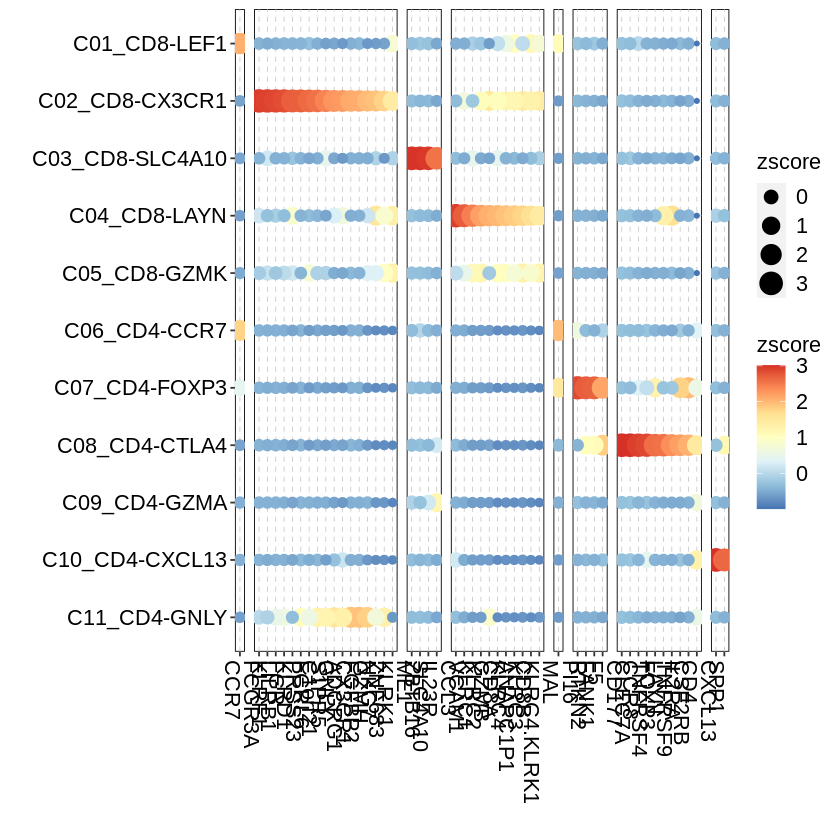

In [61]:
Marker_heatmap(data_delete_unknown, etest_gene)

In [62]:
tibble(
    ID = 1:nrow(data_delete_unknown),
    label = data_delete_unknown$label
) %>%
    dplyr::sample_frac(0.7) %>%
    dplyr::pull(ID) -> ID

train_set <- data_delete_unknown[ID,]      #construct reference set
test_set <- data_delete_unknown[-ID,]      #construct query set

In [73]:
test_set[,-ncol(test_set)]

,SNORD116.26,CDKN2B.AS1,SLCO4A1.AS1,C10orf131,LINC00892,UNQ6494,C17orf107,LOC100130872,LOC100131047,WDR86.AS1,⋯,SV2A,SRGAP3,CDC20,TMCC2,KBTBD11,KIF14,P2RY14,XYLB,GFPT2,CDC25C
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PTC143.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
TTC100.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,3,0,0,0,0,0,0,0,0
TTC2.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PTC17.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
PTC24.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,25
PTC9.0205,0,0,0,0,0,0,0,29,0,0,⋯,0,0,0,0,0,0,0,2,0,0
TTH8.0205,0,0,0,0,104,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
TTS1.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,41,0,0,0,0,0,0,0,0
TTS6.0205,0,0,0,0,0,0,0,0,0,0,⋯,0,2,0,0,0,0,0,1,0,1


In [90]:
prob <- Train(train_set, k = 1000)
model.save <- data.frame(t(prob))
predict <- Test(prob, test_set)

[1] 0.8779689


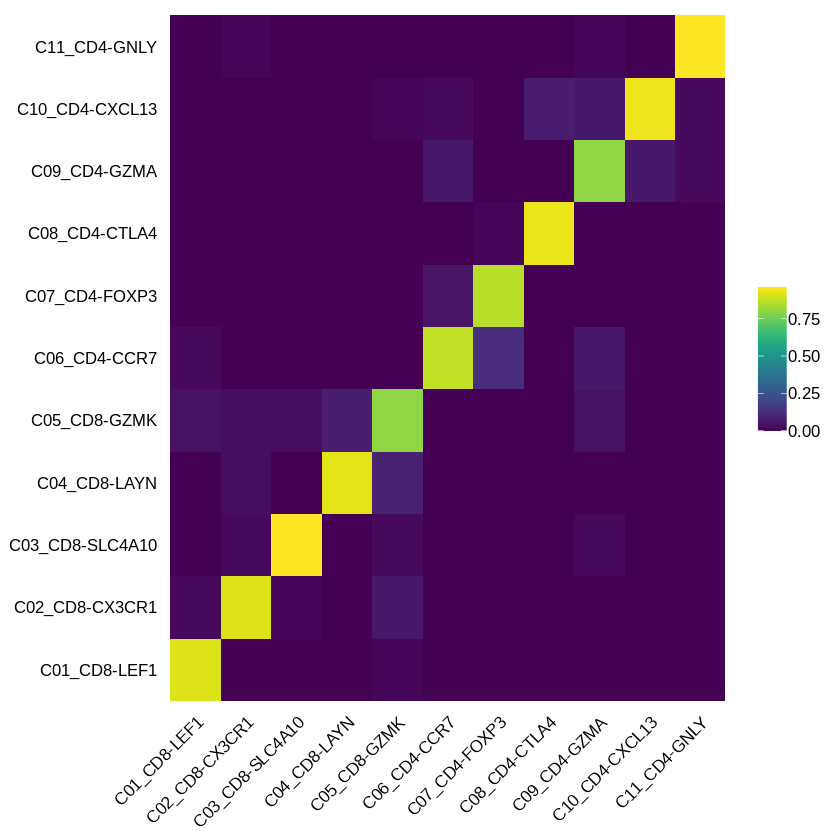

In [75]:
Confusion_heatmap(test_set$label, predict)

In [119]:
name.liver <- c('C01_CD8-LEF1', 'C02_CD8-CX3CR1', 'C03_CD8-SLC4A10', 'C04_CD8-LAYN', 'C05_CD8-GZMK',
                'C06_CD4-CCR7', 'C07_CD4-FOXP3', 'C08_CD4-CTLA4', 'C09_CD4-GZMA', 'C10_CD4-CXCL13', 'C11_CD4-GNLY')

Warning message in Confusion_heatmap_Value(name.liver, name.liver, test_set$label, :
“input should be a table, not a matrix”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message in Confusion_heatmap_Value(name.liver, name.liver, test_set$label, :
“input should be a table, not a matrix”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



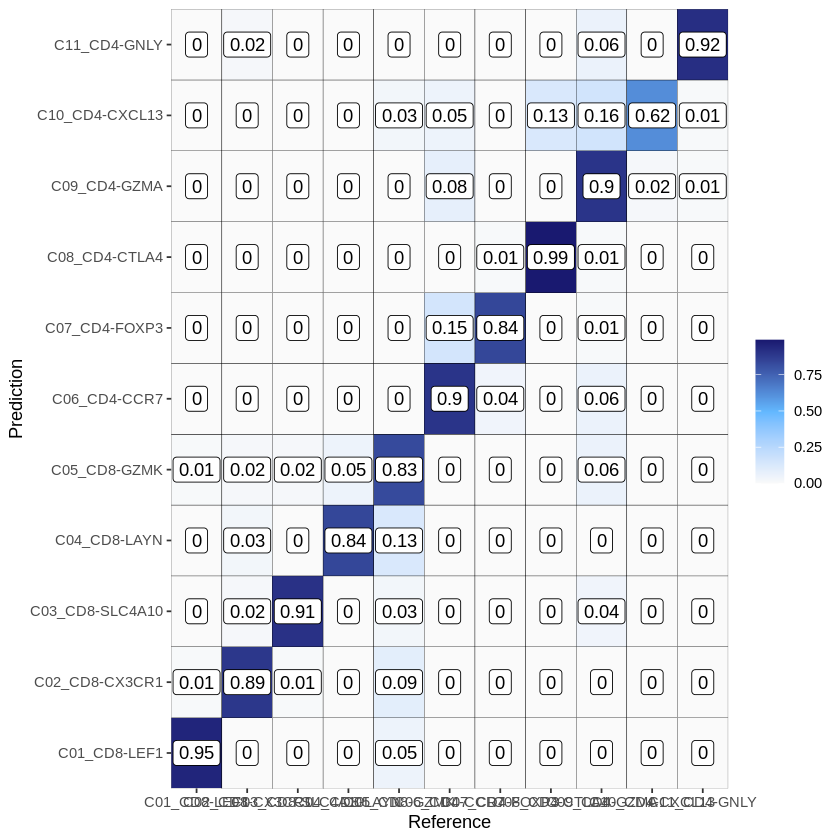

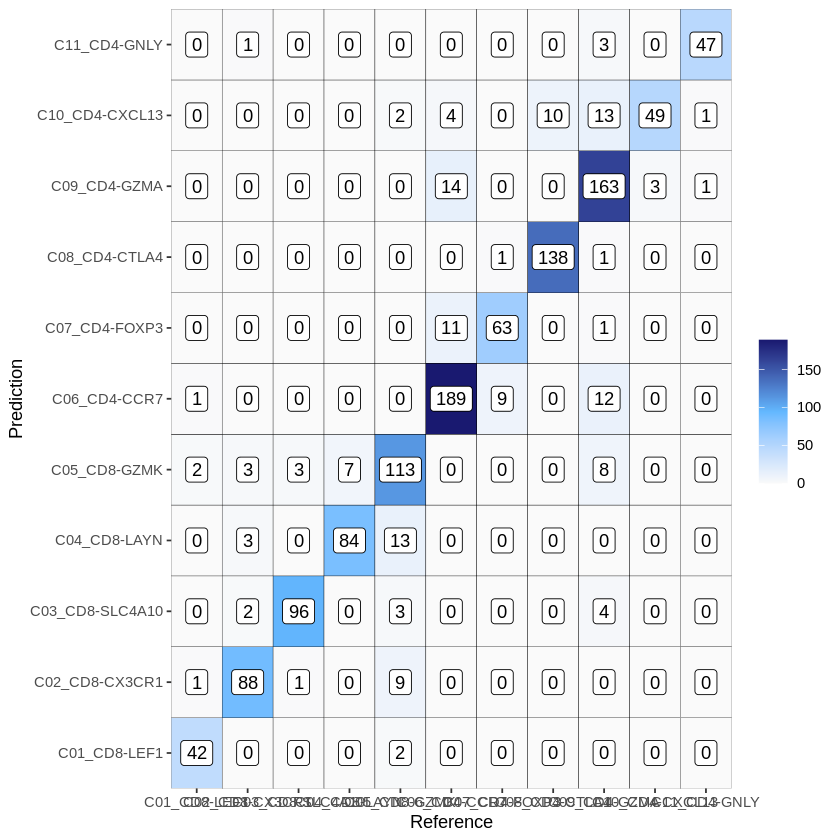

In [122]:
Confusion_heatmap_Value(name.liver, name.liver, test_set$label, predict, 'Reference','Prediction',T)
Confusion_heatmap_Value(name.liver, name.liver, test_set$label, predict, 'Reference','Prediction',F)

In [78]:
model.save

,CD8A,FGFBP2,CXCL13,CX3CR1,CD8B,KLRC4.KLRK1,KLRK1,FCGR3A,CD4,SLC4A10,⋯,FZD6,TRIP13,PRSS30P,LGALS17A,HMMR,PHLDA2,TTK,CDCA7L,PLB1,KLF8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C01_CD8-LEF1,-5.902190,-10.265964,-13.381044,-10.063850,-6.038222,-5.891378,-5.919332,-11.025170,-11.769096,-10.434891,⋯,-11.446749,-12.25810,-11.94622,-15.96601,-12.67120,-15.96601,-12.55406,-10.32295,-14.38104,-11.50052
C02_CD8-CX3CR1,-6.195966,-6.927825,-12.773339,-6.598907,-6.643811,-6.274003,-6.298472,-7.018913,-11.642193,-12.410768,⋯,-13.706224,-14.84373,-10.15814,-15.58069,-13.72333,-17.16566,-13.35331,-12.04686,-14.15767,-16.16566
C03_CD8-SLC4A10,-6.049801,-12.288451,-13.665036,-11.348204,-7.445575,-6.820519,-6.825199,-11.501823,-12.126884,-6.456691,⋯,-13.695358,-15.36548,-11.73320,-16.36548,-15.36548,-14.44233,-17.36548,-15.36548,-12.38302,-12.67606
C04_CD8-LAYN,-6.427453,-11.774741,-9.248873,-12.102794,-6.791898,-6.586640,-6.623515,-9.287182,-12.094369,-11.947398,⋯,-10.955341,-10.89521,-12.40131,-12.50881,-10.88617,-17.61486,-11.22255,-10.88257,-14.02069,-12.76651
C05_CD8-GZMK,-6.016541,-10.660608,-11.179172,-10.043558,-6.472267,-6.193015,-6.215566,-9.073890,-11.320447,-10.765667,⋯,-11.815468,-13.21841,-12.77430,-13.72472,-12.74519,-14.83379,-12.49118,-11.86061,-13.11814,-14.04729
C06_CD4-CCR7,-11.043233,-11.888185,-11.840757,-10.996899,-12.069821,-11.072506,-11.107482,-12.403920,-5.826997,-12.107793,⋯,-9.997785,-14.07965,-17.62446,-10.64048,-13.02864,-12.09166,-12.73313,-10.51698,-12.57288,-10.41579
C07_CD4-FOXP3,-11.431717,-13.089541,-11.405027,-11.731367,-11.782591,-11.732889,-11.732889,-12.848533,-5.859681,-12.642082,⋯,-12.009150,-12.47021,-16.54897,-13.14865,-12.14633,-13.74162,-11.90439,-10.11999,-15.54897,-10.53617
C08_CD4-CTLA4,-12.330395,-13.991386,-11.503889,-10.231129,-13.518644,-12.529471,-12.861942,-13.485940,-6.286475,-13.848158,⋯,-12.353347,-11.78893,-13.80680,-14.96148,-13.01637,-10.11244,-12.45620,-10.65623,-10.61321,-11.92855
C09_CD4-GZMA,-11.018477,-11.999167,-11.926423,-10.617865,-12.268736,-11.484387,-11.542813,-11.713745,-5.942901,-8.509849,⋯,-12.134997,-12.40449,-13.39902,-14.70644,-13.43897,-11.90433,-12.89561,-13.51239,-11.78987,-11.76513


In [79]:
write.csv(model.save, "T-cell_liver_model.csv")

In [80]:
model.liver <- readr::read_csv("T-cell_liver_model.csv") 
model.liver

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  X1 = col_character()
)
ℹ Use `spec()` for the full column specifications.




X1,CD8A,FGFBP2,CXCL13,CX3CR1,CD8B,KLRC4.KLRK1,KLRK1,FCGR3A,CD4,⋯,FZD6,TRIP13,PRSS30P,LGALS17A,HMMR,PHLDA2,TTK,CDCA7L,PLB1,KLF8
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C01_CD8-LEF1,-5.902190,-10.265964,-13.381044,-10.063850,-6.038222,-5.891378,-5.919332,-11.025170,-11.769096,⋯,-11.446749,-12.25810,-11.94622,-15.96601,-12.67120,-15.96601,-12.55406,-10.32295,-14.38104,-11.50052
C02_CD8-CX3CR1,-6.195966,-6.927825,-12.773339,-6.598907,-6.643811,-6.274003,-6.298472,-7.018913,-11.642193,⋯,-13.706224,-14.84373,-10.15814,-15.58069,-13.72333,-17.16566,-13.35331,-12.04686,-14.15767,-16.16566
C03_CD8-SLC4A10,-6.049801,-12.288451,-13.665036,-11.348204,-7.445575,-6.820519,-6.825199,-11.501823,-12.126884,⋯,-13.695358,-15.36548,-11.73320,-16.36548,-15.36548,-14.44233,-17.36548,-15.36548,-12.38302,-12.67606
C04_CD8-LAYN,-6.427453,-11.774741,-9.248873,-12.102794,-6.791898,-6.586640,-6.623515,-9.287182,-12.094369,⋯,-10.955341,-10.89521,-12.40131,-12.50881,-10.88617,-17.61486,-11.22255,-10.88257,-14.02069,-12.76651
C05_CD8-GZMK,-6.016541,-10.660608,-11.179172,-10.043558,-6.472267,-6.193015,-6.215566,-9.073890,-11.320447,⋯,-11.815468,-13.21841,-12.77430,-13.72472,-12.74519,-14.83379,-12.49118,-11.86061,-13.11814,-14.04729
C06_CD4-CCR7,-11.043233,-11.888185,-11.840757,-10.996899,-12.069821,-11.072506,-11.107482,-12.403920,-5.826997,⋯,-9.997785,-14.07965,-17.62446,-10.64048,-13.02864,-12.09166,-12.73313,-10.51698,-12.57288,-10.41579
C07_CD4-FOXP3,-11.431717,-13.089541,-11.405027,-11.731367,-11.782591,-11.732889,-11.732889,-12.848533,-5.859681,⋯,-12.009150,-12.47021,-16.54897,-13.14865,-12.14633,-13.74162,-11.90439,-10.11999,-15.54897,-10.53617
C08_CD4-CTLA4,-12.330395,-13.991386,-11.503889,-10.231129,-13.518644,-12.529471,-12.861942,-13.485940,-6.286475,⋯,-12.353347,-11.78893,-13.80680,-14.96148,-13.01637,-10.11244,-12.45620,-10.65623,-10.61321,-11.92855
C09_CD4-GZMA,-11.018477,-11.999167,-11.926423,-10.617865,-12.268736,-11.484387,-11.542813,-11.713745,-5.942901,⋯,-12.134997,-12.40449,-13.39902,-14.70644,-13.43897,-11.90433,-12.89561,-13.51239,-11.78987,-11.76513


In [81]:
model.liver <- pro.core(model.liver)
model.liver

,C01_CD8-LEF1,C02_CD8-CX3CR1,C03_CD8-SLC4A10,C04_CD8-LAYN,C05_CD8-GZMK,C06_CD4-CCR7,C07_CD4-FOXP3,C08_CD4-CTLA4,C09_CD4-GZMA,C10_CD4-CXCL13,C11_CD4-GNLY
CD8A,-5.902190,-6.195966,-6.049801,-6.427453,-6.016541,-11.043233,-11.431717,-12.330395,-11.018477,-11.009381,-10.746564
FGFBP2,-10.265964,-6.927825,-12.288451,-11.774741,-10.660608,-11.888185,-13.089541,-13.991386,-11.999167,-12.894597,-6.575833
CXCL13,-13.381044,-12.773339,-13.665036,-9.248873,-11.179172,-11.840757,-11.405027,-11.503889,-11.926423,-7.858558,-13.395027
CX3CR1,-10.063850,-6.598907,-11.348204,-12.102794,-10.043558,-10.996899,-11.731367,-10.231129,-10.617865,-12.605090,-6.308271
CD8B,-6.038222,-6.643811,-7.445575,-6.791898,-6.472267,-12.069821,-11.782591,-13.518644,-12.268736,-12.034199,-12.941609
KLRC4.KLRK1,-5.891378,-6.274003,-6.820519,-6.586640,-6.193015,-11.072506,-11.732889,-12.529471,-11.484387,-11.425011,-8.916086
KLRK1,-5.919332,-6.298472,-6.825199,-6.623515,-6.215566,-11.107482,-11.732889,-12.861942,-11.542813,-11.484086,-8.925931
FCGR3A,-11.025170,-7.018913,-11.501823,-9.287182,-9.073890,-12.403920,-12.848533,-13.485940,-11.713745,-12.374452,-8.633645
CD4,-11.769096,-11.642193,-12.126884,-12.094369,-11.320447,-5.826997,-5.859681,-6.286475,-5.942901,-6.276243,-6.175476
SLC4A10,-10.434891,-12.410768,-6.456691,-11.947398,-10.765667,-12.107793,-12.642082,-13.848158,-8.509849,-11.536715,-12.483756


In [124]:
#交叉测试
data.lung <- readRDS("data_lung.rds")
label.lung <- readRDS("anno_lung.rds")
data.lung$label <- label.lung$majorCluster
data.lung

,NAT2,ADA,CDH2,AKT3,GAGE12F,ZBTB11.AS1,MED6,NR2E3,NAALAD2,SNORD116.1,⋯,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2,label
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
NTH10.0616A,0,223,0,57,0,0,1,0,0,0,⋯,0,0,0,63,122,0,0,0,0,CD4_C4-CD69
NTH11.0616A,0,519,0,0,0,105,4,0,0,0,⋯,2,0,0,0,24,0,595,0,0,other.diverse
NTH15.0616A,0,0,0,0,0,0,1,0,0,0,⋯,458,0,0,39,3,0,0,0,324,DN.diverse
NTH17.0616A,0,0,0,0,0,0,379,0,0,0,⋯,1327,0,0,0,13,0,0,0,0,CD4_C6-GZMA
NTH2.0616A,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,353,1,0,0,0,0,CD4_C3-GNLY
NTH4.0616A,0,120,0,0,0,0,256,0,0,0,⋯,0,0,0,0,818,0,0,1,497,other.diverse
NTR15.0616A,0,511,0,0,0,119,960,0,0,0,⋯,1,0,0,0,0,0,776,0,0,DN.diverse
NTR16.0616A,0,0,0,0,0,0,3,0,0,0,⋯,1,0,0,1404,0,0,0,0,220,filtered
NTR17.0616A,0,0,0,0,0,0,1,0,0,0,⋯,1331,0,0,0,253,0,0,0,0,DN.diverse


In [125]:
index_remain <- which(data.lung$label == "CD4_C1-CCR7" 
           | data.lung$label == "CD4_C2-ANXA1"
           | data.lung$label == "CD4_C3-GNLY"
           | data.lung$label == "CD4_C4-CD69"
           | data.lung$label == "CD4_C5-EOMES"
           | data.lung$label == "CD4_C6-GZMA"
           | data.lung$label == "CD4_C7-CXCL13"
           | data.lung$label == "CD4_C8-FOXP3"
           | data.lung$label == "CD4_C9-CTLA4"
           | data.lung$label == "CD8_C1-LEF1"
           | data.lung$label == "CD8_C2-CD28"
           | data.lung$label == "CD8_C3-CX3CR1"
           | data.lung$label == "CD8_C4-GZMK"
           | data.lung$label == "CD8_C5-ZNF683"
           | data.lung$label == "CD8_C6-LAYN"
           | data.lung$label == "CD8_C7-SLC4A10")
length(index_remain)

[1] 9055

In [126]:
data.lung <- data.lung[index_remain,]
label.lung <- data.lung$label 

In [127]:
predict.liver <- CrossTest(model.liver, data.lung)

In [128]:
length(predict.liver)
length(label.lung)
predict.liver
label.lung

[1] 9055

[1] 9055

[1] "C06_CD4-CCR7"    "C05_CD8-GZMK"    "C11_CD4-GNLY"    "C02_CD8-CX3CR1" 
   [5] "C02_CD8-CX3CR1"  "C01_CD8-LEF1"    "C01_CD8-LEF1"    "C02_CD8-CX3CR1" 
   [9] "C02_CD8-CX3CR1"  "C01_CD8-LEF1"    "C02_CD8-CX3CR1"  "C02_CD8-CX3CR1" 
  [13] "C01_CD8-LEF1"    "C05_CD8-GZMK"    "C01_CD8-LEF1"    "C02_CD8-CX3CR1" 
  [17] "C02_CD8-CX3CR1"  "C02_CD8-CX3CR1"  "C01_CD8-LEF1"    "C01_CD8-LEF1"   
  [21] "C01_CD8-LEF1"    "C01_CD8-LEF1"    "C01_CD8-LEF1"    "C01_CD8-LEF1"   
  [25] "C01_CD8-LEF1"    "C01_CD8-LEF1"    "C02_CD8-CX3CR1"  "C01_CD8-LEF1"   
  [29] "C02_CD8-CX3CR1"  "C02_CD8-CX3CR1"  "C02_CD8-CX3CR1"  "C02_CD8-CX3CR1" 
  [33] "C01_CD8-LEF1"    "C02_CD8-CX3CR1"  "C01_CD8-LEF1"    "C02_CD8-CX3CR1" 
  [37] "C01_CD8-LEF1"    "C01_CD8-LEF1"    "C02_CD8-CX3CR1"  "C01_CD8-LEF1"   
  [41] "C01_CD8-LEF1"    "C01_CD8-LEF1"    "C02_CD8-CX3CR1"  "C02_CD8-CX3CR1" 
  [45] "C02_CD8-CX3CR1"  "C02_CD8-CX3CR1"  "C02_CD8-CX3CR1"  "C01_CD8-LEF1"   
  [49] "C02_CD8-CX3CR1"  "C01_CD8-LEF1"    "C02_CD8-CX3CR1"  "C01_CD8-LEF1"   
  [53] "C02_CD8-CX3CR1"  "C02_CD8-CX3CR1"  "C01_CD8-LEF1"    "C02_CD8-CX3CR1" 
  [57] "C02_CD8-CX3CR1"  "C01_CD8-LEF1"    "C11_CD4-GNLY"    "C06_CD4-CCR7"   
  [61] "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"   
  [65] "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"   
  [69] "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"   
  [73] "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"   
  [77] "C06_CD4-CCR7"    "C01_CD8-LEF1"    "C06_CD4-CCR7"    "C06_CD4-CCR7"   
  [81] "C06_CD4-CCR7"    "C11_CD4-GNLY"    "C06_CD4-CCR7"    "C11_CD4-GNLY"   
  [85] "C11_CD4-GNLY"    "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"   
  [89] "C06_CD4-CCR7"    "C11_CD4-GNLY"    "C06_CD4-CCR7"    "C09_CD4-GZMA"   
  [93] "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"   
  [97] "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C11_CD4-GNLY"    "C06_CD4-CCR7"   
 [101] "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C11_CD4-GNLY"    "C06_CD4-CCR7"   
 [105] "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C11_CD4-GNLY"    "C06_CD4-CCR7"   
 [109] "C09_CD4-GZMA"    "C06_CD4-CCR7"    "C09_CD4-GZMA"    "C07_CD4-FOXP3"  
 [113] "C11_CD4-GNLY"    "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"   
 [117] "C07_CD4-FOXP3"   "C06_CD4-CCR7"    "C11_CD4-GNLY"    "C06_CD4-CCR7"   
 [121] "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C07_CD4-FOXP3"  
 [125] "C06_CD4-CCR7"    "C11_CD4-GNLY"    "C06_CD4-CCR7"    "C07_CD4-FOXP3"  
 [129] "C07_CD4-FOXP3"   "C06_CD4-CCR7"    "C07_CD4-FOXP3"   "C06_CD4-CCR7"   
 [133] "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C11_CD4-GNLY"    "C06_CD4-CCR7"   
 [137] "C07_CD4-FOXP3"   "C06_CD4-CCR7"    "C01_CD8-LEF1"    "C09_CD4-GZMA"   
 [141] "C06_CD4-CCR7"    "C06_CD4-CCR7"    "C07_CD4-FOXP3"   "C06_CD4-CCR7"   
 [145] "C07_CD4-FOXP3"   "C02_CD8-CX3CR1"  "C05_CD8-GZMK"    "C03_CD8-SLC4A10"
 [149] "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"   
 [153] "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C03_CD8-SLC4A10" "C05_CD8-GZMK"   
 [157] "C03_CD8-SLC4A10" "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"   
 [161] "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"   
 [165] "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"   
 [169] "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C03_CD8-SLC4A10" "C05_CD8-GZMK"   
 [173] "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"   
 [177] "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C03_CD8-SLC4A10"
 [181] "C04_CD8-LAYN"    "C01_CD8-LEF1"    "C05_CD8-GZMK"    "C05_CD8-GZMK"   
 [185] "C05_CD8-GZMK"    "C01_CD8-LEF1"    "C05_CD8-GZMK"    "C05_CD8-GZMK"   
 [189] "C05_CD8-GZMK"    "C02_CD8-CX3CR1"  "C05_CD8-GZMK"    "C03_CD8-SLC4A10"
 [193] "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"   
 [197] "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-GZMK"   
 [201] "C05_CD8-GZMK"    "C05_CD8-GZMK"    "C05_CD8-G

[1] "CD4_C4-CD69"    "CD4_C6-GZMA"    "CD4_C3-GNLY"    "CD8_C2-CD28"   
   [5] "CD8_C3-CX3CR1"  "CD8_C1-LEF1"    "CD8_C1-LEF1"    "CD8_C3-CX3CR1" 
   [9] "CD8_C3-CX3CR1"  "CD8_C1-LEF1"    "CD8_C3-CX3CR1"  "CD8_C3-CX3CR1" 
  [13] "CD8_C1-LEF1"    "CD8_C2-CD28"    "CD8_C7-SLC4A10" "CD8_C3-CX3CR1" 
  [17] "CD8_C3-CX3CR1"  "CD8_C3-CX3CR1"  "CD8_C1-LEF1"    "CD8_C1-LEF1"   
  [21] "CD8_C1-LEF1"    "CD8_C1-LEF1"    "CD8_C1-LEF1"    "CD8_C1-LEF1"   
  [25] "CD8_C1-LEF1"    "CD8_C1-LEF1"    "CD8_C3-CX3CR1"  "CD8_C1-LEF1"   
  [29] "CD8_C3-CX3CR1"  "CD8_C3-CX3CR1"  "CD8_C3-CX3CR1"  "CD8_C3-CX3CR1" 
  [33] "CD8_C1-LEF1"    "CD8_C3-CX3CR1"  "CD8_C1-LEF1"    "CD8_C3-CX3CR1" 
  [37] "CD8_C1-LEF1"    "CD8_C1-LEF1"    "CD8_C3-CX3CR1"  "CD8_C1-LEF1"   
  [41] "CD8_C1-LEF1"    "CD8_C1-LEF1"    "CD8_C3-CX3CR1"  "CD8_C3-CX3CR1" 
  [45] "CD8_C3-CX3CR1"  "CD8_C3-CX3CR1"  "CD8_C3-CX3CR1"  "CD8_C1-LEF1"   
  [49] "CD8_C3-CX3CR1"  "CD8_C1-LEF1"    "CD8_C3-CX3CR1"  "CD8_C1-LEF1"   
  [53] "CD8_C3-CX3CR1"  "CD8_C3-CX3CR1"  "CD8_C1-LEF1"    "CD8_C3-CX3CR1" 
  [57] "CD8_C3-CX3CR1"  "CD8_C2-CD28"    "CD4_C3-GNLY"    "CD4_C1-CCR7"   
  [61] "CD4_C1-CCR7"    "CD4_C1-CCR7"    "CD4_C1-CCR7"    "CD4_C1-CCR7"   
  [65] "CD4_C1-CCR7"    "CD4_C1-CCR7"    "CD4_C1-CCR7"    "CD4_C1-CCR7"   
  [69] "CD4_C1-CCR7"    "CD4_C1-CCR7"    "CD4_C1-CCR7"    "CD4_C1-CCR7"   
  [73] "CD4_C1-CCR7"    "CD4_C1-CCR7"    "CD4_C4-CD69"    "CD4_C1-CCR7"   
  [77] "CD4_C1-CCR7"    "CD4_C4-CD69"    "CD4_C1-CCR7"    "CD4_C1-CCR7"   
  [81] "CD4_C4-CD69"    "CD4_C3-GNLY"    "CD4_C1-CCR7"    "CD4_C3-GNLY"   
  [85] "CD4_C4-CD69"    "CD4_C1-CCR7"    "CD4_C1-CCR7"    "CD4_C1-CCR7"   
  [89] "CD4_C1-CCR7"    "CD4_C3-GNLY"    "CD4_C4-CD69"    "CD4_C4-CD69"   
  [93] "CD4_C1-CCR7"    "CD4_C1-CCR7"    "CD4_C4-CD69"    "CD4_C1-CCR7"   
  [97] "CD4_C1-CCR7"    "CD4_C1-CCR7"    "CD4_C3-GNLY"    "CD4_C1-CCR7"   
 [101] "CD4_C1-CCR7"    "CD4_C1-CCR7"    "CD4_C3-GNLY"    "CD4_C1-CCR7"   
 [105] "CD4_C1-CCR7"    "CD4_C4-CD69"    "CD4_C3-GNLY"    "CD4_C1-CCR7"   
 [109] "CD4_C4-CD69"    "CD4_C8-FOXP3"   "CD4_C4-CD69"    "CD4_C8-FOXP3"  
 [113] "CD4_C3-GNLY"    "CD4_C2-ANXA1"   "CD4_C1-CCR7"    "CD4_C2-ANXA1"  
 [117] "CD4_C8-FOXP3"   "CD4_C8-FOXP3"   "CD4_C3-GNLY"    "CD4_C2-ANXA1"  
 [121] "CD4_C4-CD69"    "CD4_C2-ANXA1"   "CD4_C4-CD69"    "CD4_C8-FOXP3"  
 [125] "CD4_C1-CCR7"    "CD4_C3-GNLY"    "CD4_C2-ANXA1"   "CD4_C8-FOXP3"  
 [129] "CD4_C4-CD69"    "CD4_C2-ANXA1"   "CD4_C8-FOXP3"   "CD4_C2-ANXA1"  
 [133] "CD4_C8-FOXP3"   "CD4_C1-CCR7"    "CD4_C4-CD69"    "CD4_C4-CD69"   
 [137] "CD4_C8-FOXP3"   "CD4_C2-ANXA1"   "CD4_C4-CD69"    "CD4_C4-CD69"   
 [141] "CD4_C1-CCR7"    "CD4_C8-FOXP3"   "CD4_C8-FOXP3"   "CD4_C8-FOXP3"  
 [145] "CD4_C8-FOXP3"   "CD8_C3-CX3CR1"  "CD8_C4-GZMK"    "CD8_C7-SLC4A10"
 [149] "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"   
 [153] "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C7-SLC4A10" "CD8_C4-GZMK"   
 [157] "CD8_C7-SLC4A10" "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"   
 [161] "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"   
 [165] "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"   
 [169] "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C5-ZNF683"  "CD8_C4-GZMK"   
 [173] "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"   
 [177] "CD8_C5-ZNF683"  "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C7-SLC4A10"
 [181] "CD8_C3-CX3CR1"  "CD8_C1-LEF1"    "CD8_C4-GZMK"    "CD8_C4-GZMK"   
 [185] "CD8_C4-GZMK"    "CD8_C1-LEF1"    "CD8_C5-ZNF683"  "CD8_C4-GZMK"   
 [189] "CD8_C4-GZMK"    "CD8_C3-CX3CR1"  "CD8_C4-GZMK"    "CD8_C7-SLC4A10"
 [193] "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"   
 [197] "CD8_C5-ZNF683"  "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C5-ZNF683" 
 [201] "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C4-GZMK"   
 [205] "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C3-CX3CR1"  "CD8_C4-GZMK"   
 [209] "CD8_C4-GZMK"    "CD8_C4-GZMK"    "CD8_C3-CX3CR1"  "CD8_C4-GZMK"   
 [213] "CD8_C4-GZMK"    "CD8

In [129]:
name.liver <- c('C01_CD8-LEF1', 'C02_CD8-CX3CR1', 'C03_CD8-SLC4A10', 'C04_CD8-LAYN', 'C05_CD8-GZMK',
                'C06_CD4-CCR7', 'C07_CD4-FOXP3', 'C08_CD4-CTLA4', 'C09_CD4-GZMA', 'C10_CD4-CXCL13', 'C11_CD4-GNLY')
name.lung <- c('CD4_C1-CCR7', 'CD4_C2-ANXA1', 'CD4_C3-GNLY', 'CD4_C4-CD69', 'CD4_C5-EOMES','CD4_C6-GZMA',
                'CD4_C7-CXCL13', 'CD4_C8-FOXP3', 'CD4_C9-CTLA4', 'CD8_C1-LEF1', 'CD8_C2-CD28', 'CD8_C3-CX3CR1',
               'CD8_C4-GZMK', 'CD8_C5-ZNF683', 'CD8_C6-LAYN', 'CD8_C7-SLC4A10')

Warning message in Confusion_heatmap_Value(name.lung, name.liver, label.lung, predict.liver, :
“input should be a table, not a matrix”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.

Warning message in Confusion_heatmap_Value(name.lung, name.liver, label.lung, predict.liver, :
“input should be a table, not a matrix”
Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



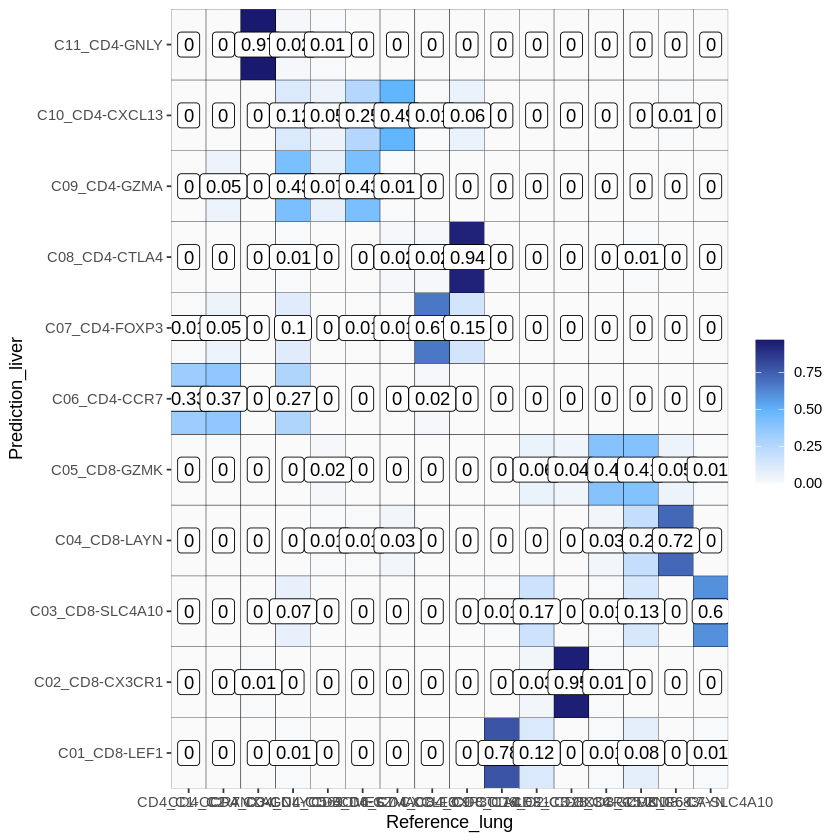

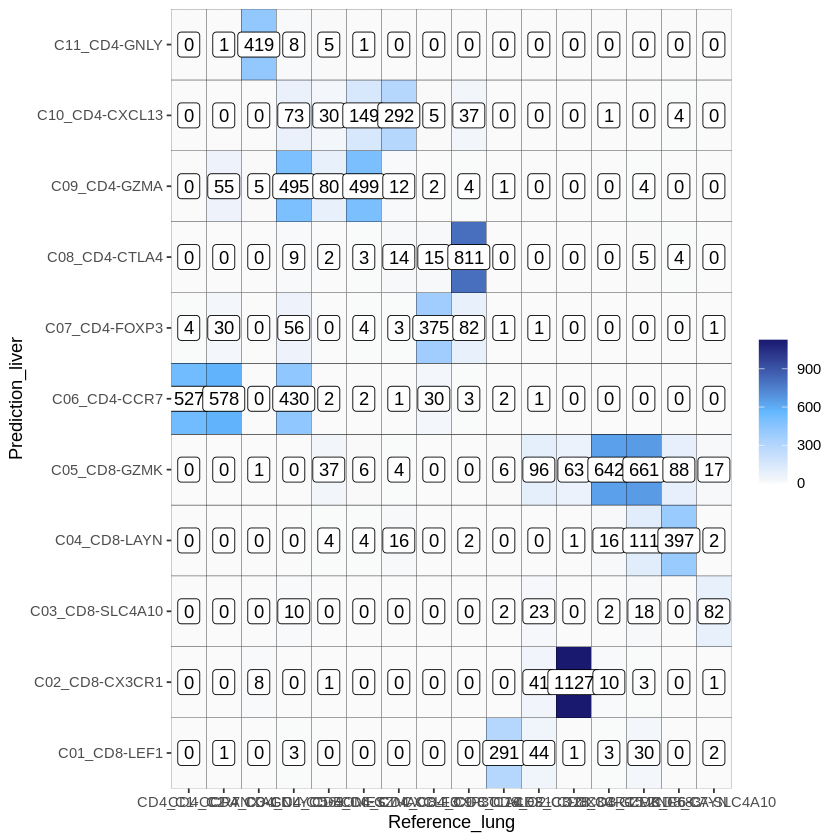

In [130]:
#肺癌数据为reference，用肝癌数据模型预测肺癌数据
Confusion_heatmap_Value(name.lung, name.liver, label.lung, predict.liver, 'Reference_lung','Prediction_liver',T)
Confusion_heatmap_Value(name.lung, name.liver, label.lung, predict.liver, 'Reference_lung','Prediction_liver',F)
# CD4-GNLY, CD4-CTLA4, CX3CR1基本重叠